### Here i am using the cannada data set to calculate the per capital income of the ucommping future by building a simple linear regression model


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('/content/canada_per_capita_income.csv')
df[0:20]

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [10]:
df.rename({'per capita income (US$)':'price'},axis=1,inplace=True)
df

,year,price
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    47 non-null     int64  
 1   price   47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [12]:
df.isnull().sum()

,0
year,0
price,0


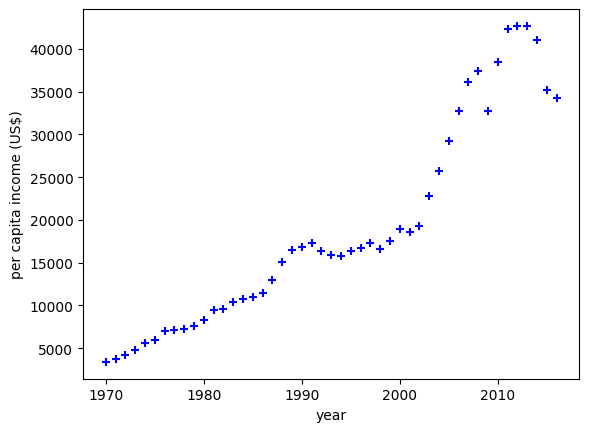

In [13]:
# finding the relation between the columns by scatter plot
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df['year'],df['price'],color='blue',marker='+')

In [14]:
# Corellation
df.iloc[:,[0,1]].corr()

,year,price
year,1.000000,0.943884
price,0.943884,1.000000


<Axes: xlabel='year', ylabel='Density'>

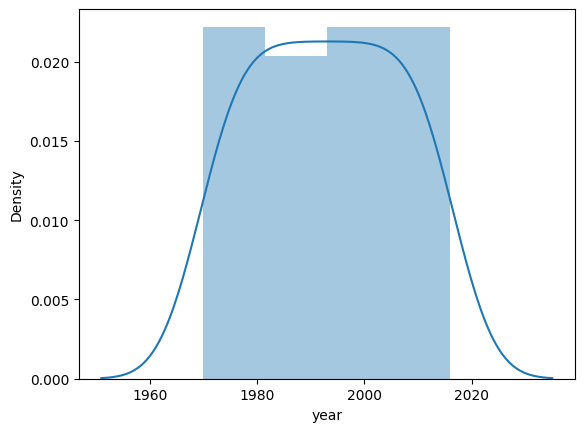

In [15]:
# dense plot for the two columns
import seaborn as sas
sas.distplot(df['year'])

<Axes: xlabel='price', ylabel='Density'>

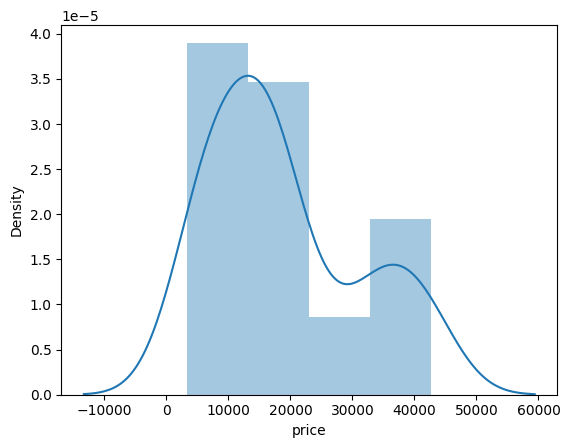

In [16]:
import seaborn as sas
sas.distplot(df['price'])

Fitting linear regression model

In [17]:
#ols= Ordinary least square value
import statsmodels.formula.api as smf

In [18]:
model=smf.ols('price~year',data=df).fit()

<Axes: xlabel='year', ylabel='price'>

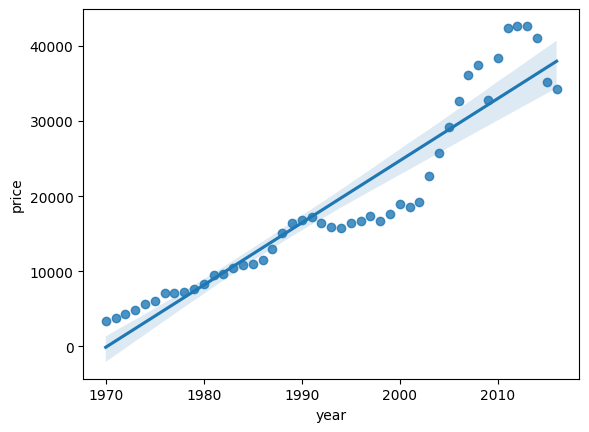

In [19]:
#Creating the graph
sas.regplot(x='year',y='price',data=df)

In [20]:
#Coefficients
model.params

,0
Intercept,-1.632211e+06
year,8.284651e+02


In [21]:
#y=mx+c
m=8.284651e+02
c=-1.632211e+06
#x=2024
# we can pridect the price for the upcomming year 2024
print('the capital income price of the canada on upcomming 2024 is:',8.284651e+02*2024-1.632211e+06)

the capital income price of the canada on upcomming 2024 is: 44602.36239999998


In [22]:
model.fittedvalues

,0
0,-134.559667
1,693.905409
2,1522.370484
3,2350.835559
4,3179.300634
5,4007.765709
6,4836.230785
7,5664.695860
8,6493.160935
9,7321.626010


In [23]:
#prediction of the model
df['Predictioprice_model']=model.fittedvalues

In [24]:
# error in the model
model.resid

,0
0,3533.858704
1,3074.392526
2,2728.805000
3,2453.627689
4,2397.213949
5,1990.378637
6,2225.900607
7,1435.430310
8,754.806100
9,281.286671


In [25]:
df['Error_Model']=model.resid


In [26]:
df['Error_square']=model.resid**2


In [27]:
df[0:5]

,year,price,Predictioprice_model,Error_Model,Error_square
0,1970,3399.299037,-134.559667,3533.858704,1.248816e+07
1,1971,3768.297935,693.905409,3074.392526,9.451889e+06
2,1972,4251.175484,1522.370484,2728.805000,7.446377e+06
3,1973,4804.463248,2350.835559,2453.627689,6.020289e+06
4,1974,5576.514583,3179.300634,2397.213949,5.746635e+06


In [28]:
model.rsquared
#89.09% of variation in the dependent variable is explained by the given independent variable

0.8909169179570319

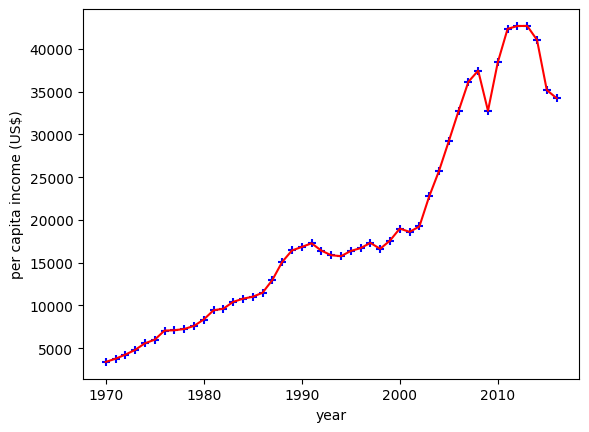

In [29]:
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df['year'],df['price'],color='blue',marker='+')
plt.plot(df['year'],df['price'],color='red')

In [31]:
#creating the model
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.predict(df.price)

TypeError: LinearClassifierMixin.predict() takes 2 positional arguments but 3 were given

Another example


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
x=np.arange(11)
y=[]
m=-2
c=3
for i in x:
  y.append(m*i+c)
  print(x)
  print(y)
plt.plot(x,y)
plt.xlabel('x ranges')
plt.ylabel('y values')
for i,j in zip(x,y):
  plt.text(i,j,'({},{})'.format(i,j))